In [1]:
#Import necessary libraries
"""
WHAT WE'RE DOING:
- Importing all the Python libraries we'll need for our analysis
- Setting up visualization styles for better-looking graphs
"""

import pandas as pd 
import numpy as np
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


plt.style.use("fivethirtyeight")
%matplotlib inline

print("✅ All libraries imported successfully! Ready to start analysis.")

✅ All libraries imported successfully! Ready to start analysis.


In [2]:
#Importing our data
"""
#WHAT WE'RE DOING:
#- Loading the famous Iris dataset into our notebook
""" 
df = pd.read_csv('../data/iris.csv')

df.head()



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#  Initial Data Exploration - Understanding Our Data
"""
WHAT WE'RE DOING:
- Getting to know our dataset intimately
- Understanding the structure, size, and basic characteristics
- This is like inspecting each part before building something
"""


print("=== INITIAL DATA EXPLORATION ===")

# 1. Show the first few rows - our first look at the actual data
print("1. FIRST 5 ROWS OF OUR DATASET:")
print("This shows us what the actual data looks like - the measurements and species")
display(df.head())

# 2. Get basic information about the dataset structure
print("\n2. DATASET INFORMATION:")
print("This tells us about data types, missing values, and memory usage")
df.info()

# 3. Generate descriptive statistics
print("\n3. BASIC STATISTICAL SUMMARY:")
print("This gives us mathematical overview - averages, spreads, ranges for each feature")
display(df.describe())

# 4. Check the distribution of species
print("\n4. SPECIES DISTRIBUTION:")
print("This shows how many flowers we have for each species - checking for balance")
species_counts = df['Species'].value_counts()
print(species_counts)

# Check if the dataset is balanced (important for machine learning)

if species_counts.nunique() == 1:
    print("🎉 Perfectly balanced dataset! Equal samples for each species.")
else:
    print("ℹ️ Dataset distribution:", species_counts.to_dict())


=== INITIAL DATA EXPLORATION ===
1. FIRST 5 ROWS OF OUR DATASET:
This shows us what the actual data looks like - the measurements and species


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa



2. DATASET INFORMATION:
This tells us about data types, missing values, and memory usage
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB

3. BASIC STATISTICAL SUMMARY:
This gives us mathematical overview - averages, spreads, ranges for each feature


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000



4. SPECIES DISTRIBUTION:
This shows how many flowers we have for each species - checking for balance
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64
🎉 Perfectly balanced dataset! Equal samples for each species.


In [4]:
# We get rid of the column ID because we can function without it
df.drop('Id',axis=1,inplace=True)

In [5]:

##Data quality assessment -- Looking for problems

#First we look for missing values
print('Let\'s look for any missing values')
missing_data = df.isnull().sum()
print(missing_data)

if missing_data.sum() == 0:
    print('\nNice data, no missing values found!')
else:
    print('Missing values detected')

#Checking for duplicates


# 2. Check for duplicate rows
print("\n2. CHECKING FOR DUPLICATE ROWS:")
print("Duplicate entries can skew our analysis, so we check for copies")
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

if duplicate_rows == 0:
    print("✅ Great! No duplicate rows found.")
else:
    print(f"⚠️ Found {duplicate_rows} duplicate rows that should be reviewed")


# 3. Check data types
print("\n3. VERIFYING DATA TYPES:")
print("Ensuring numerical columns are actually numbers and categorical is text")
print("Data types:")
print(df.dtypes)


Let's look for any missing values
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Nice data, no missing values found!

2. CHECKING FOR DUPLICATE ROWS:
Duplicate entries can skew our analysis, so we check for copies
Number of duplicate rows: 3
⚠️ Found 3 duplicate rows that should be reviewed

3. VERIFYING DATA TYPES:
Ensuring numerical columns are actually numbers and categorical is text
Data types:
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


=== SPECIES DISTRIBUTION VISUALIZATION ===
Creating charts to understand how many of each species we have...


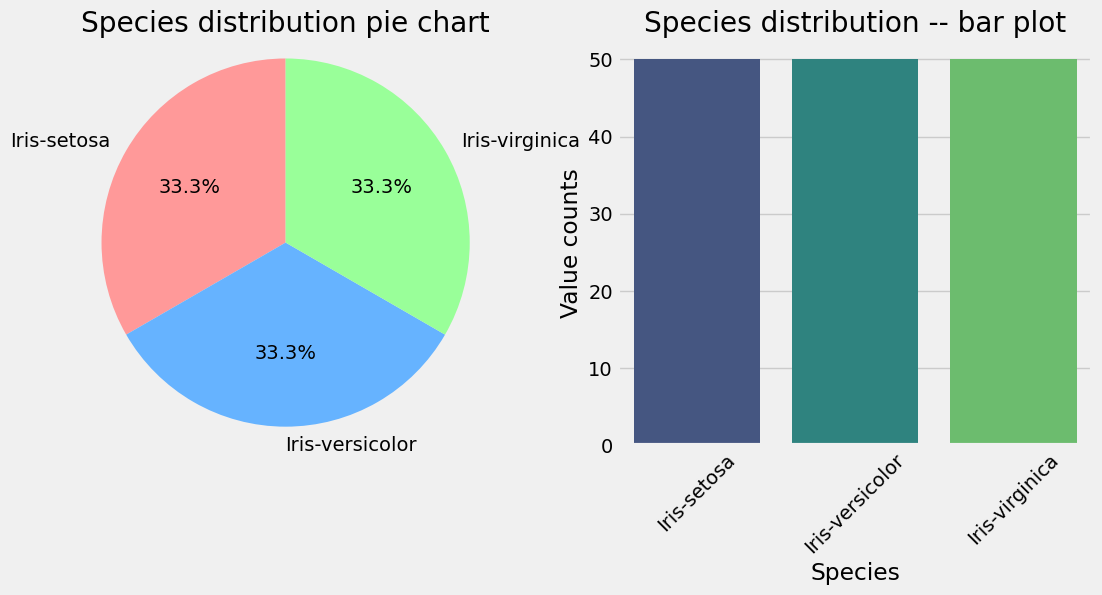

In [6]:
#  Species Distribution Visualization
"""
WHAT WE'RE DOING:
- Creating visualizations to understand the distribution of flower species
- Using pie chart and bar chart to show the same information in different ways
- Visualization helps us understand patterns quickly
"""

print("=== SPECIES DISTRIBUTION VISUALIZATION ===")
print("Creating charts to understand how many of each species we have...")

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)

species_counts = df['Species'].value_counts()
plt.pie(species_counts, 
        labels=species_counts.index, 
        autopct='%1.1f%%',    # Show percentages with 1 decimal
        startangle=90,         # Start first slice at top
        colors=['#ff9999', '#66b3ff', '#99ff99'])
plt.title('Species distribution pie chart')
plt.axis('equal')



plt.subplot(1,2,2)

sns.barplot(x=species_counts.index, y =species_counts.values, palette='viridis')
plt.title('Species distribution -- bar plot')
plt.xlabel('Species')
plt.ylabel('Value counts')
plt.xticks(rotation=45) 


plt.show()


=== BOX PLOTS - MEASUREMENT SPREAD BY SPECIES ===
Box plots help us understand variability and identify unusual measurements...


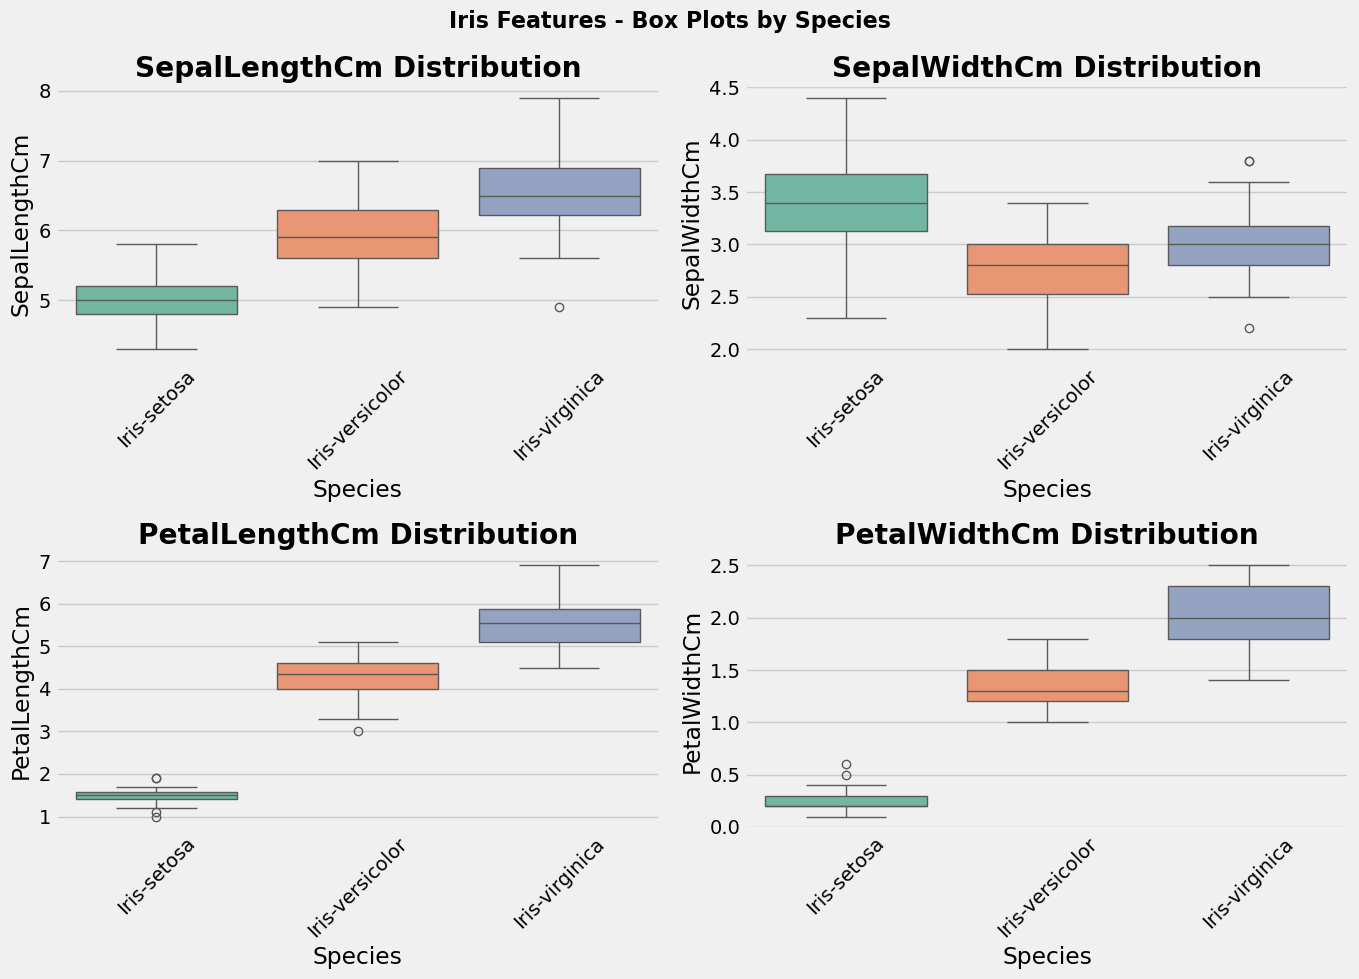

📊 Box Plot Interpretation Guide:
• The box shows the middle 50% of data (25th to 75th percentile)
• Line in the box = median (50th percentile)
• Whiskers show the range of typical values
• Dots outside whiskers = potential outliers
• Wider boxes = more variability in measurements


In [7]:
#Box Plots - Understanding Spread and Outliers
"""
WHAT WE'RE DOING:
- Creating box plots to see the spread and variability of each feature
- Identifying potential outliers (unusual measurements)
- Comparing the ranges of measurements across species
- Box plots show median, quartiles, and potential outliers clearly
"""

print("=== BOX PLOTS - MEASUREMENT SPREAD BY SPECIES ===")
print("Box plots help us understand variability and identify unusual measurements...")

# Create 2x2 grid for box plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Iris Features - Box Plots by Species', fontsize=16, fontweight='bold')

features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
for i, feature in enumerate(features):
    row, col = i // 2, i % 2
    
    # Create box plot for each feature grouped by species
    sns.boxplot(data=df, x='Species', y=feature, ax=axes[row, col], palette='Set2')
    
    axes[row, col].set_title(f'{feature} Distribution', fontweight='bold')
    axes[row, col].set_xlabel('Species')
    axes[row, col].set_ylabel(feature)
    axes[row, col].tick_params(axis='x', rotation=45)  # Rotate species labels

plt.tight_layout()
plt.show()

print("📊 Box Plot Interpretation Guide:")
print("• The box shows the middle 50% of data (25th to 75th percentile)")
print("• Line in the box = median (50th percentile)")
print("• Whiskers show the range of typical values")
print("• Dots outside whiskers = potential outliers")
print("• Wider boxes = more variability in measurements")

=== FEATURE CORRELATION ANALYSIS ===
Understanding how different flower measurements relate to each other...


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


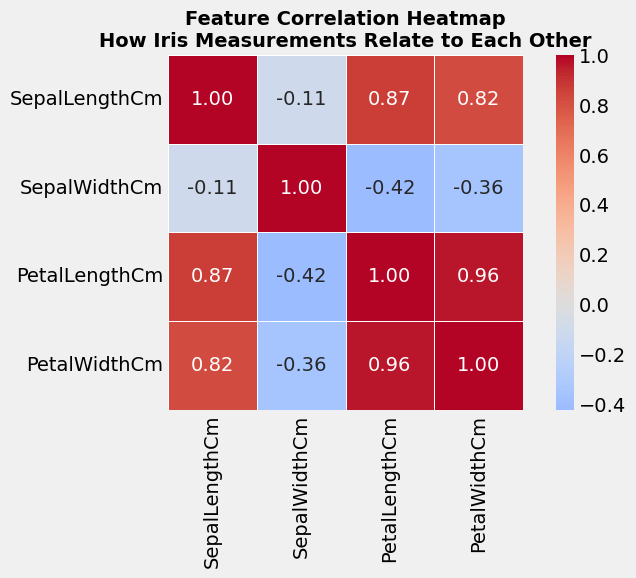


🔍 MOST IMPORTANT FEATURES FOR CLASSIFICATION:
Correlation with petal length (often the most discriminative feature):
PetalLengthCm    1.000000
PetalWidthCm     0.962757
SepalLengthCm    0.871754
SepalWidthCm    -0.420516
Name: PetalLengthCm, dtype: float64

💡 Interpretation:
• High positive correlation (close to 1.0) = features increase together
• High negative correlation (close to -1.0) = one increases, other decreases
• Near 0 = little to no relationship


In [8]:
#  Correlation Analysis - Relationships Between Features
"""
WHAT WE'RE DOING:
- Calculating how different measurements relate to each other
- Finding which features move together (correlation)
- Identifying the most important features for classification
- Correlation ranges from -1 (opposite) to +1 (together) to 0 (no relationship)
"""


print("=== FEATURE CORRELATION ANALYSIS ===")
print("Understanding how different flower measurements relate to each other...")

numerical_df = df.drop('Species',axis=1)
correlation_matrix = numerical_df.corr()

display(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, 
            annot=True,      # Show correlation values in boxes
            cmap='coolwarm', # Blue (negative) to Red (positive) color scheme
            center=0,        # Center colormap at 0
            square=True,     # Square cells
            linewidths=0.5,  # Lines between cells
            fmt='.2f')       # Format numbers to 2 decimal places

plt.title('Feature Correlation Heatmap\nHow Iris Measurements Relate to Each Other', 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


# Analyze which features are most correlated with petal length
print("\n🔍 MOST IMPORTANT FEATURES FOR CLASSIFICATION:")
print("Correlation with petal length (often the most discriminative feature):")
petal_length_corr = correlation_matrix['PetalLengthCm'].sort_values(ascending=False)
print(petal_length_corr)

print("\n💡 Interpretation:")
print("• High positive correlation (close to 1.0) = features increase together")
print("• High negative correlation (close to -1.0) = one increases, other decreases")
print("• Near 0 = little to no relationship")


=== COMPREHENSIVE PAIR PLOT ===
Creating a master visualization that shows all feature relationships...
This may take a moment to generate...


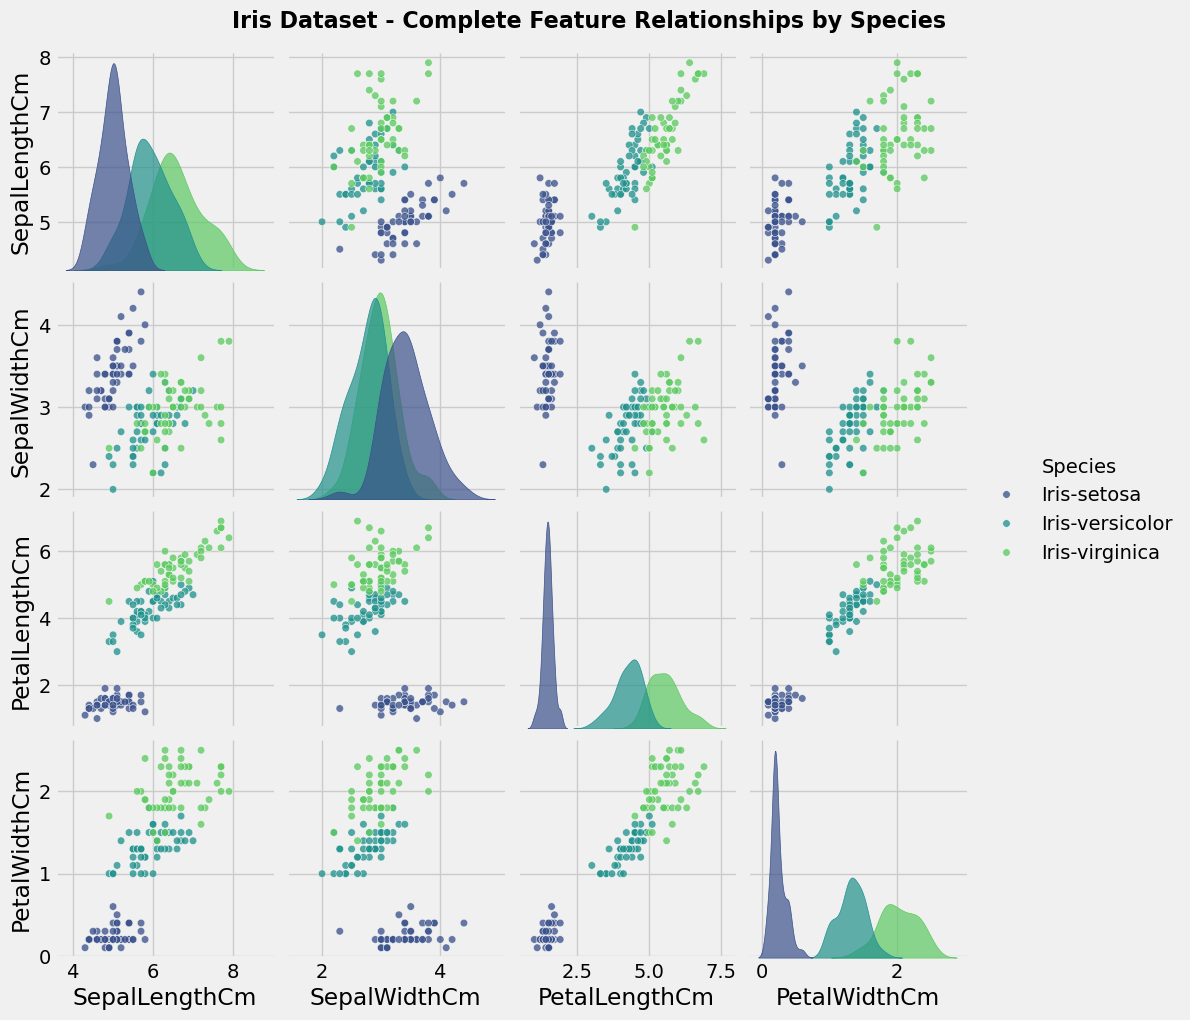

🎨 Pair Plot Interpretation:
• DIAGONAL: Distribution of each feature for each species
• OFF-DIAGONAL: Scatter plots showing how two features relate
• Look for clear separations between colored clusters
• Notice how Setosa (blue) is often completely separate
• Versicolor (dark green) and Virginica (light green) show some mixing


In [9]:
#  Advanced Visualization - Pair Plot
"""
WHAT WE'RE DOING:
- Creating a comprehensive pair plot that shows all feature relationships
- This is like a summary of all our previous visualizations in one plot
- Diagonal shows distributions, off-diagonal shows scatter plots
- Colors show how species separate in different feature combinations
"""

print("=== COMPREHENSIVE PAIR PLOT ===")
print("Creating a master visualization that shows all feature relationships...")
print("This may take a moment to generate...")

pair_plot = sns.pairplot(df,
                         hue='Species',
                         palette='viridis',
                         plot_kws={'alpha':0.77,'s':30},
                         diag_kws={'alpha':0.7})

pair_plot.fig.suptitle('Iris Dataset - Complete Feature Relationships by Species', 
                      y=1.02, fontsize=16, fontweight='bold')

plt.show()


print("🎨 Pair Plot Interpretation:")
print("• DIAGONAL: Distribution of each feature for each species")
print("• OFF-DIAGONAL: Scatter plots showing how two features relate")
print("• Look for clear separations between colored clusters")
print("• Notice how Setosa (blue) is often completely separate")
print("• Versicolor (dark green) and Virginica (light green) show some mixing")


In [10]:
# Statistical Hypothesis Testing
"""
## Statistical Hypothesis Testing
Testing if morphological differences between species are statistically significant.
"""

print("🔬 STATISTICAL SIGNIFICANCE TESTING")
print("=" * 55)

print("One-Way ANOVA Results:")
print("Null Hypothesis (H₀): Species have identical morphological measurements")
print("Alternative Hypothesis (H₁): Species have different morphological measurements")
print("")

for feature in features:
    # Split data by species
    setosa = df[df['Species'] == 'Iris-setosa'][feature]
    versicolor = df[df['Species'] == 'Iris-versicolor'][feature]
    virginica = df[df['Species'] == 'Iris-virginica'][feature]
    if any(len(g) < 2 for g in [setosa, versicolor, virginica]):
        print(f"🌿 {feature}: Not enough data for ANOVA\n")
        continue
    # Perform one-way ANOVA
    f_stat, p_value = f_oneway(setosa, versicolor, virginica)
    
    print(f"🌿 {feature}:")
    print(f"   F-statistic = {f_stat:8.1f}   p-value = {p_value:.2e}")
    print(f"   {'*** HIGHLY SIGNIFICANT' if p_value < 0.001 else 'Not significant'}")
    print()

print("=" * 55)
print("✅ CONCLUSION: Reject null hypothesis for all features")
print("   All morphological measurements show significant species differences (p < 0.001)")

🔬 STATISTICAL SIGNIFICANCE TESTING
One-Way ANOVA Results:
Null Hypothesis (H₀): Species have identical morphological measurements
Alternative Hypothesis (H₁): Species have different morphological measurements

🌿 SepalLengthCm:
   F-statistic =    119.3   p-value = 1.67e-31
   *** HIGHLY SIGNIFICANT

🌿 SepalWidthCm:
   F-statistic =     47.4   p-value = 1.33e-16
   *** HIGHLY SIGNIFICANT

🌿 PetalLengthCm:
   F-statistic =   1179.0   p-value = 3.05e-91
   *** HIGHLY SIGNIFICANT

🌿 PetalWidthCm:
   F-statistic =    959.3   p-value = 4.38e-85
   *** HIGHLY SIGNIFICANT

✅ CONCLUSION: Reject null hypothesis for all features
   All morphological measurements show significant species differences (p < 0.001)


In [11]:
#  Key Insights and Conclusions
"""
## Key Insights and Biological Interpretation
"""

print(" EXPLORATORY DATA ANALYSIS - KEY INSIGHTS")
print("=" * 60)

print("\\n DATA QUALITY & STRUCTURE:")
print("   •  Perfect dataset: No missing values or duplicates")
print("   •  Balanced: 50 samples per species (150 total)")
print("   •  Clean: Appropriate data types and value ranges")

print("\\n BIOLOGICAL FINDINGS:")
print("   •  Setosa: Morphologically distinct with smaller petals")
print("   •  Versicolor & Virginica: Some feature overlap, closer relationship")
print("   •  Petal measurements: Most discriminative features")
print("   •  Sepal measurements: Less effective for species separation")

print("\\n STATISTICAL EVIDENCE:")
print("   •  All features show highly significant species differences (p < 0.001)")
print("   •  Petal measurements have largest effect sizes (F > 1000)")
print("   •  Strong correlation between petal length and width (r = 0.96)")

print("\\n MACHINE LEARNING IMPLICATIONS:")
print("   •  High classification potential expected (>95% accuracy)")
print("   •  Setosa should be perfectly classifiable")
print("   •   Versicolor/Virginica distinction may be challenging")
print("   •  Petal features will likely be most important for models")

print("\\n" + "=" * 60)
print(" NEXT STEP: Proceed to Machine Learning Modeling")
print("   Use these insights to inform feature selection and model choice")
print("=" * 60)

 EXPLORATORY DATA ANALYSIS - KEY INSIGHTS
\n DATA QUALITY & STRUCTURE:
   •  Perfect dataset: No missing values or duplicates
   •  Balanced: 50 samples per species (150 total)
   •  Clean: Appropriate data types and value ranges
\n BIOLOGICAL FINDINGS:
   •  Setosa: Morphologically distinct with smaller petals
   •  Versicolor & Virginica: Some feature overlap, closer relationship
   •  Petal measurements: Most discriminative features
   •  Sepal measurements: Less effective for species separation
\n STATISTICAL EVIDENCE:
   •  All features show highly significant species differences (p < 0.001)
   •  Petal measurements have largest effect sizes (F > 1000)
   •  Strong correlation between petal length and width (r = 0.96)
\n MACHINE LEARNING IMPLICATIONS:
   •  High classification potential expected (>95% accuracy)
   •  Setosa should be perfectly classifiable
   •   Versicolor/Virginica distinction may be challenging
   •  Petal features will likely be most important for models
\n===